Общая информация о выбранных данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_dbh          683788 non-null  int64  
 1   curb_loc          683788 non-null  object 
 2   steward           164350 non-null  object 
 3   guards            79866 non-null   object 
 4   sidewalk          652172 non-null  object 
 5   root_stone        683788 non-null  object 
 6   root_grate        683788 non-null  object 
 7   root_other        683788 non-null  object 
 8   trunk_wire        683788 non-null  object 
 9   trnk_light        683788 non-null  object 
 10  trnk_other        683788 non-null  object 
 11  brch_light        683788 non-null  object 
 12  brch_shoe         683788 non-null  object 
 13  brch_other        683788 non-null  object 
 14  spc_latin         652169 non-null  object 
 15  health            652172 non-nu

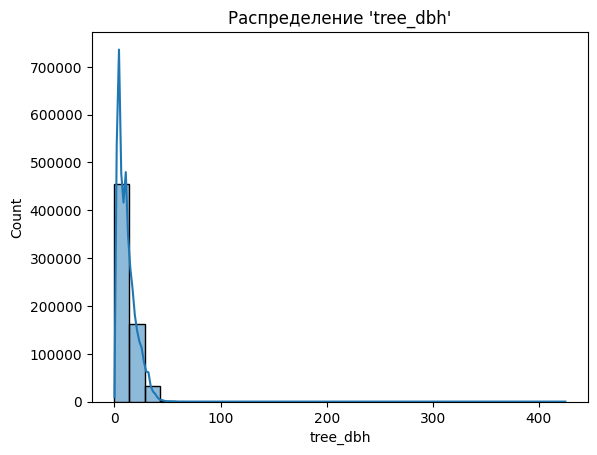


Распределение целевой переменной 'health':
health
Good    528850
Fair     96504
Poor     26818
Name: count, dtype: int64


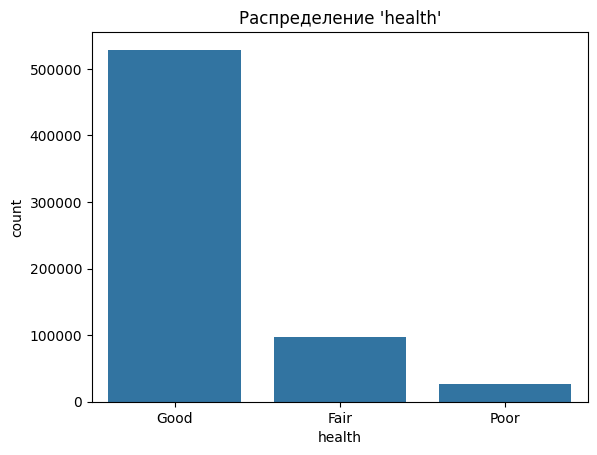

Очищенные данные сохранены в 'cleaned_dataset.csv'


In [1]:
# Импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
# Укажите путь к вашему CSV-файлу
df = pd.read_csv("../data/2015-street-tree-census-tree-data.csv")

# Выбор значимых признаков
selected_features = [
    "tree_dbh", "curb_loc", "steward", "guards", "sidewalk",
    "root_stone", "root_grate", "root_other",
    "trunk_wire", "trnk_light", "trnk_other",
    "brch_light", "brch_shoe", "brch_other",
    "spc_latin", "health",'y_sp','x_sp','longitude','latitude',
    'census tract','council district',

]

df = df[selected_features]

# 1. Проверка данных
print("Общая информация о выбранных данных:")
df.info()
print("\nКоличество пропущенных значений:")
print(df.isnull().sum())

# 2. Удаление строк с пропусками в целевой переменной
df = df.dropna(subset=["health"])
print("\nРазмер данных после удаления строк с пропусками в 'health':", df.shape)

# 3. Предобработка данных
# Кодирование категориальных признаков
categorical_columns = [
    "curb_loc", "steward", "guards", "sidewalk",
    "root_stone", "root_grate", "root_other",
    "trunk_wire", "trnk_light", "trnk_other",
    "brch_light", "brch_shoe", "brch_other",
    "spc_latin"
]

# Заполнение пропусков в категориальных данных (если есть)
for col in categorical_columns:
    df[col] = df[col].fillna("Unknown")

# Кодирование категориальных признаков с помощью one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# 4. Анализ числовых признаков
print("\nСтатистики числового признака 'tree_dbh':")
print(df["tree_dbh"].describe())

sns.histplot(df["tree_dbh"], bins=30, kde=True)
plt.title("Распределение 'tree_dbh'")
plt.show()

# 5. Распределение целевой переменной
print("\nРаспределение целевой переменной 'health':")
print(df["health"].value_counts())

sns.countplot(data=df, x="health", order=df["health"].value_counts().index)
plt.title("Распределение 'health'")
plt.show()

# 6. Корреляция между признаками (для числовых данных)
df_numeric = df.select_dtypes(include=['float64', 'int64'])  # Выбираем только числовые признаки
correlation_matrix = df_numeric.corr()

# 7. Сохранение очищенного датасета
df_encoded.to_csv("cleaned_dataset.csv", index=False)
print("Очищенные данные сохранены в 'cleaned_dataset.csv'")


In [2]:
# Drop rows with NaN values
df = df.dropna()

# Or fill NaN values
# df = df.fillna(0)  # Example to fill with 0

In [3]:
non_numeric_cols = df.select_dtypes(include=['object']).columns
print(non_numeric_cols)

Index(['curb_loc', 'steward', 'guards', 'sidewalk', 'root_stone', 'root_grate',
       'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light',
       'brch_shoe', 'brch_other', 'spc_latin', 'health'],
      dtype='object')


In [4]:
# Дропаем все столбцы, кроме categorical_columns
df_filtered = df.drop(columns=[col for col in df.columns if col not in categorical_columns])

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['health'] = label_encoder.fit_transform(df['health'])

In [6]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])  # Выбираем только числовые признаки
correlation_matrix = df_numeric.corr()

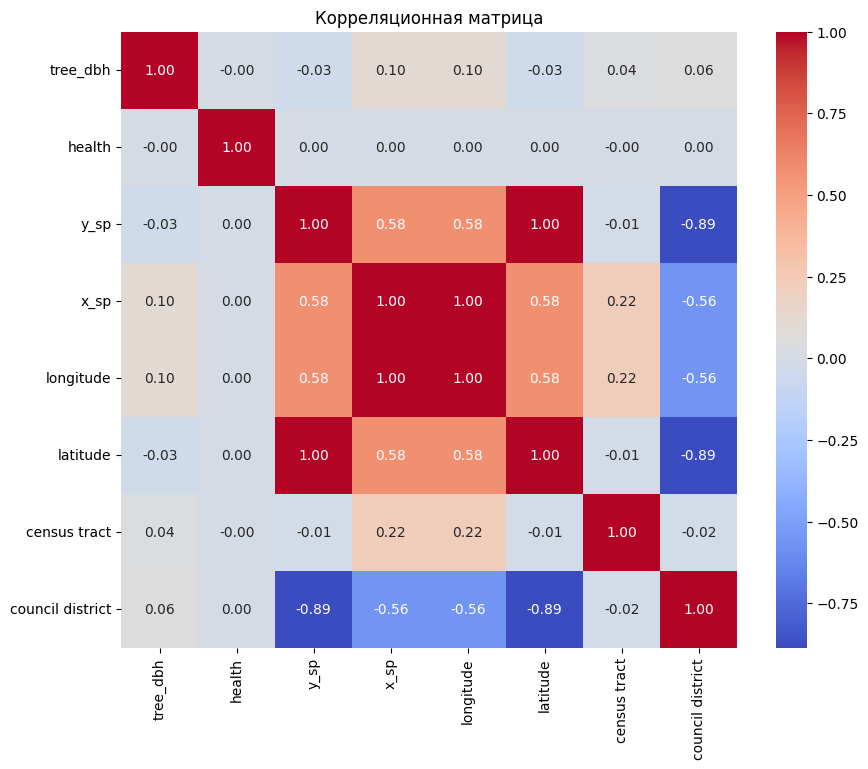

In [7]:
# Вычисление корреляции
correlation_matrix = df_numeric.corr()

# Визуализация
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

Общая информация о выбранных данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_dbh          683788 non-null  int64  
 1   curb_loc          683788 non-null  object 
 2   steward           164350 non-null  object 
 3   guards            79866 non-null   object 
 4   sidewalk          652172 non-null  object 
 5   root_stone        683788 non-null  object 
 6   root_grate        683788 non-null  object 
 7   root_other        683788 non-null  object 
 8   trunk_wire        683788 non-null  object 
 9   trnk_light        683788 non-null  object 
 10  trnk_other        683788 non-null  object 
 11  brch_light        683788 non-null  object 
 12  brch_shoe         683788 non-null  object 
 13  brch_other        683788 non-null  object 
 14  spc_latin         652169 non-null  object 
 15  health            652172 non-nu

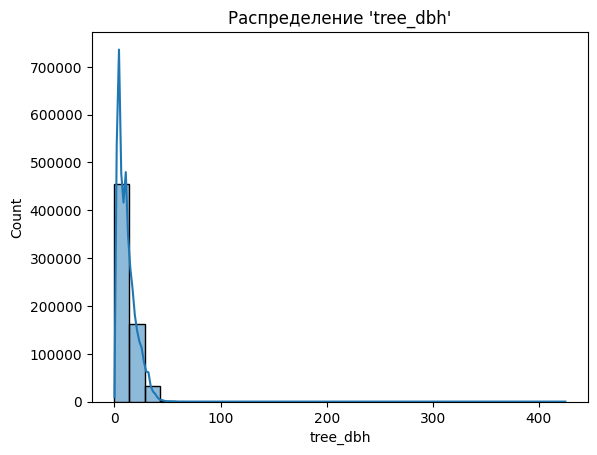


Распределение целевой переменной 'health':
health
Good    528850
Fair     96504
Poor     26818
Name: count, dtype: int64


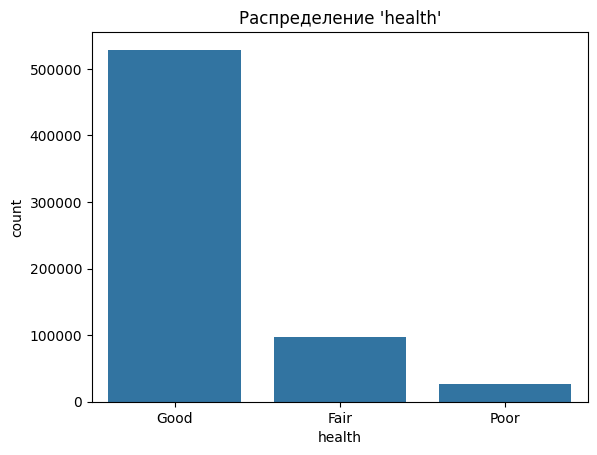

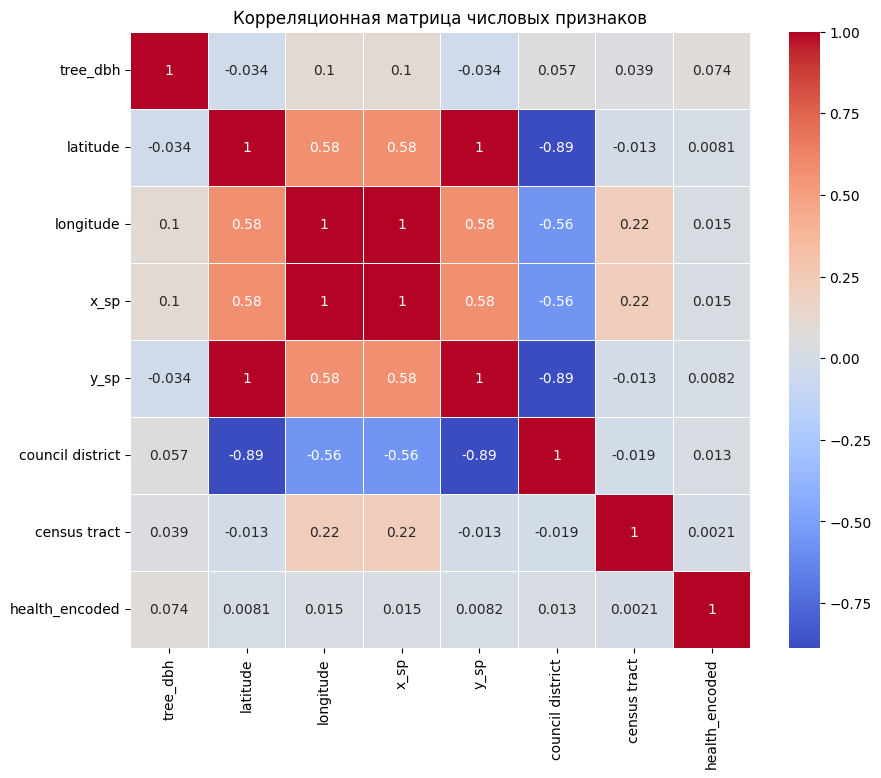

Очищенные данные сохранены в 'cleaned_dataset.csv'


/tmp/ipykernel_230677/2544594321.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="health", y=feature, palette="coolwarm")


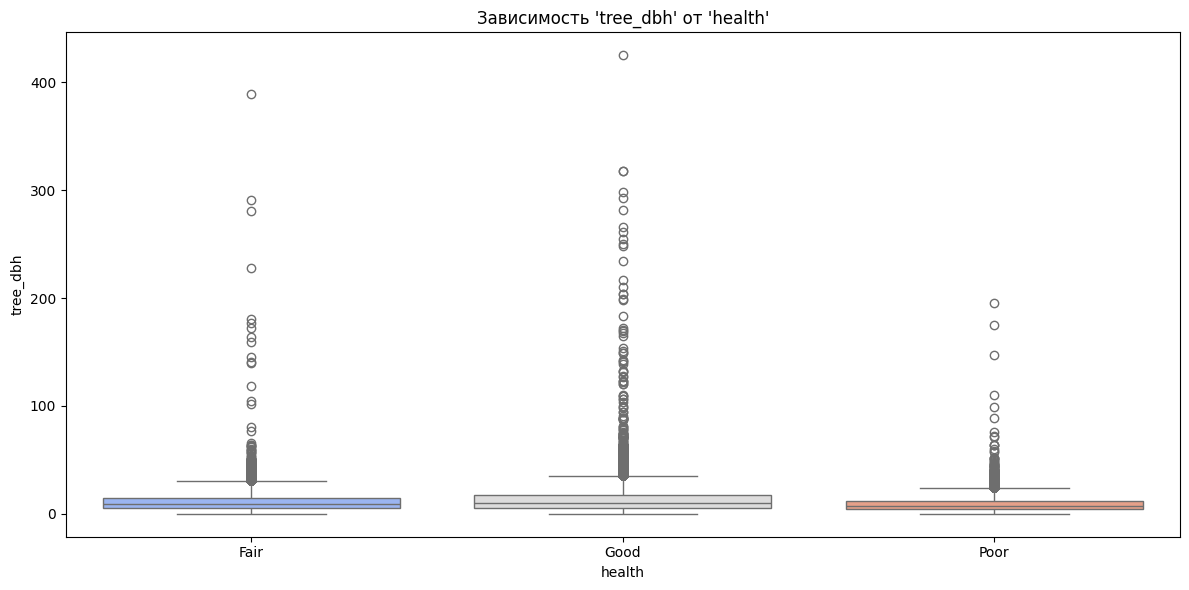

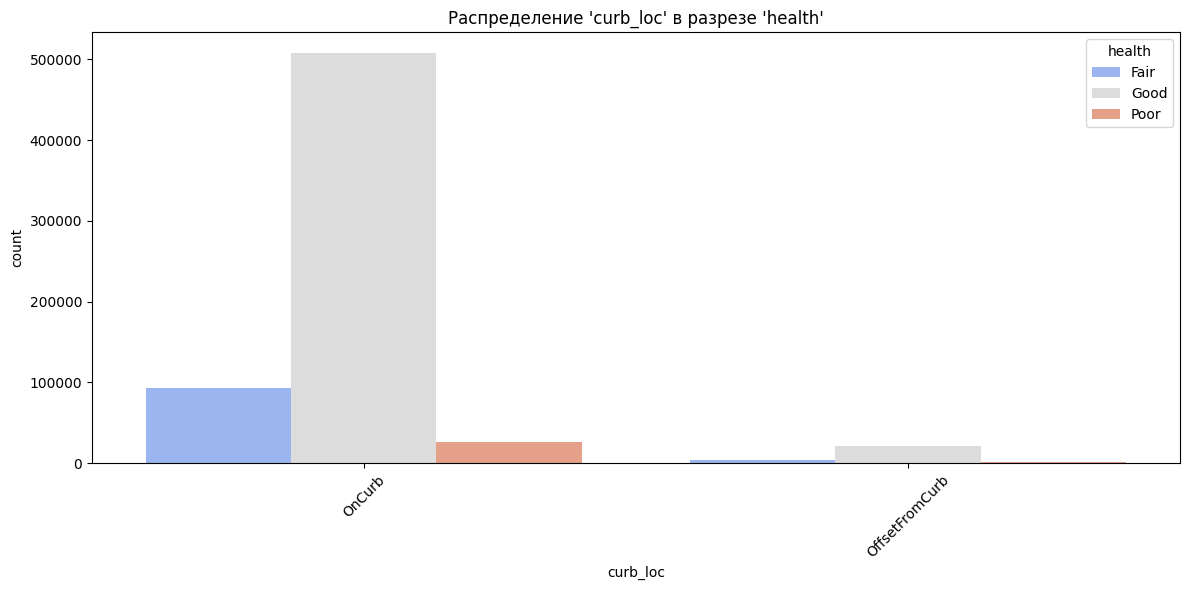

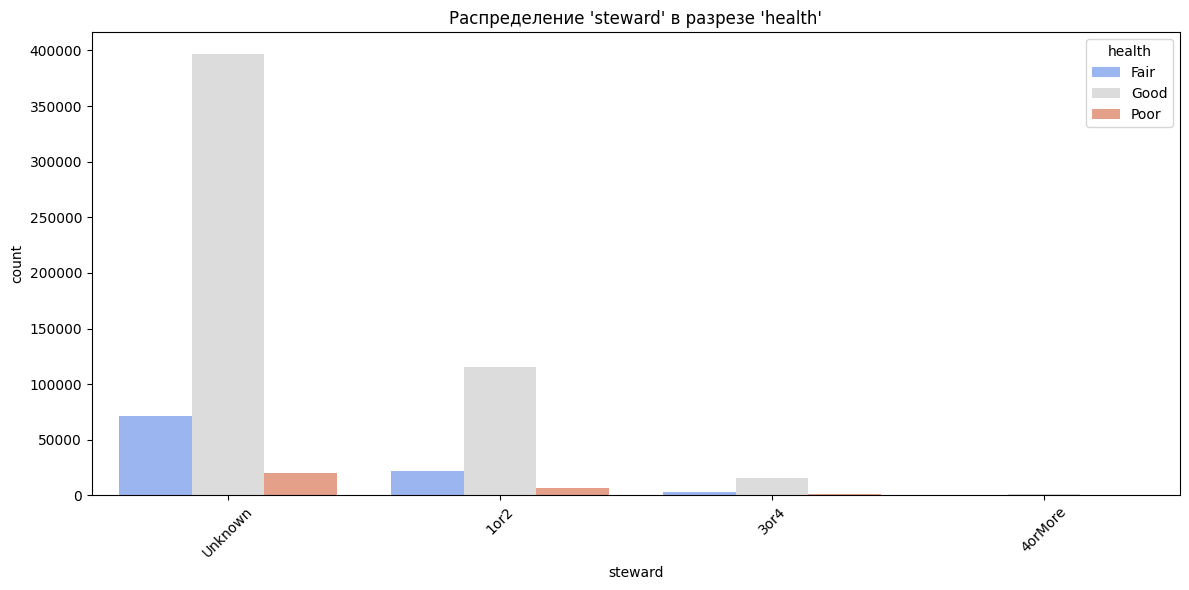

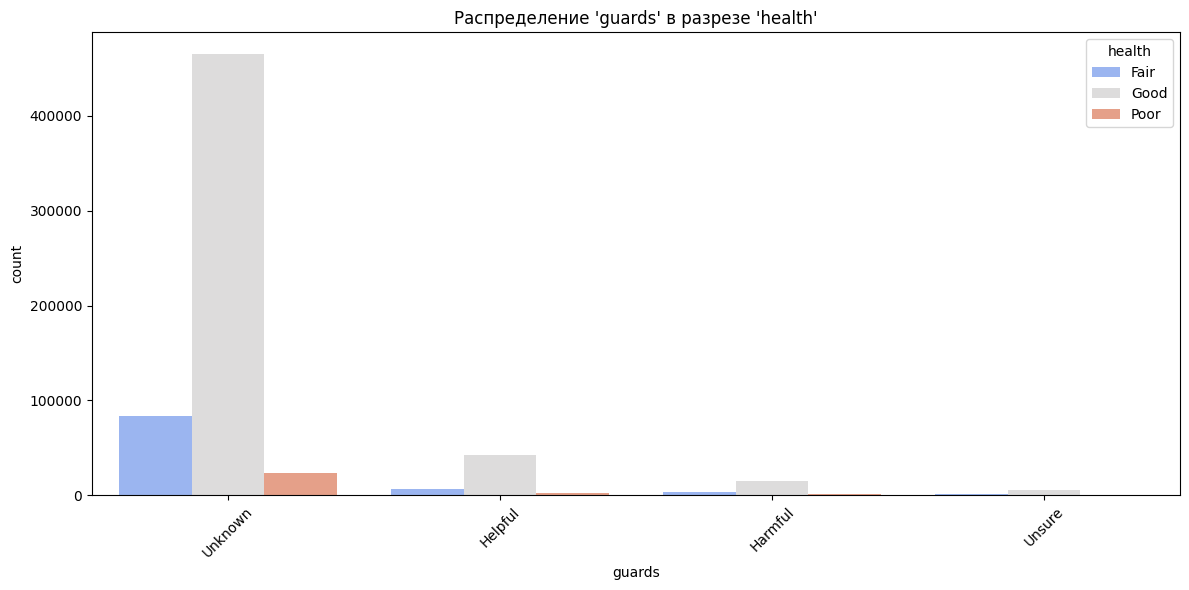

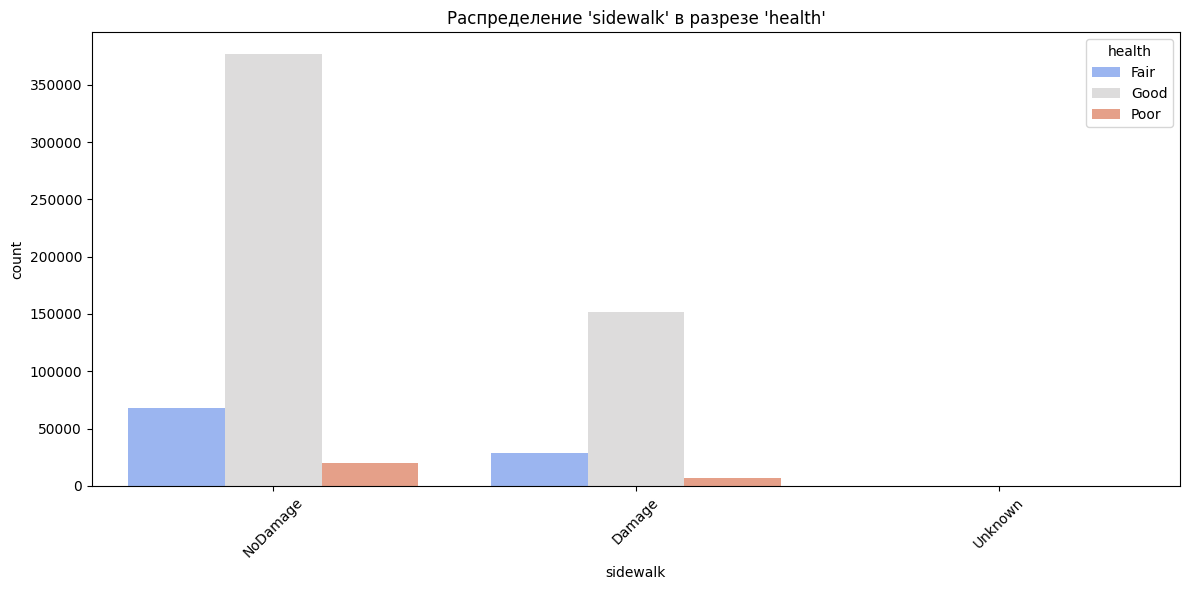

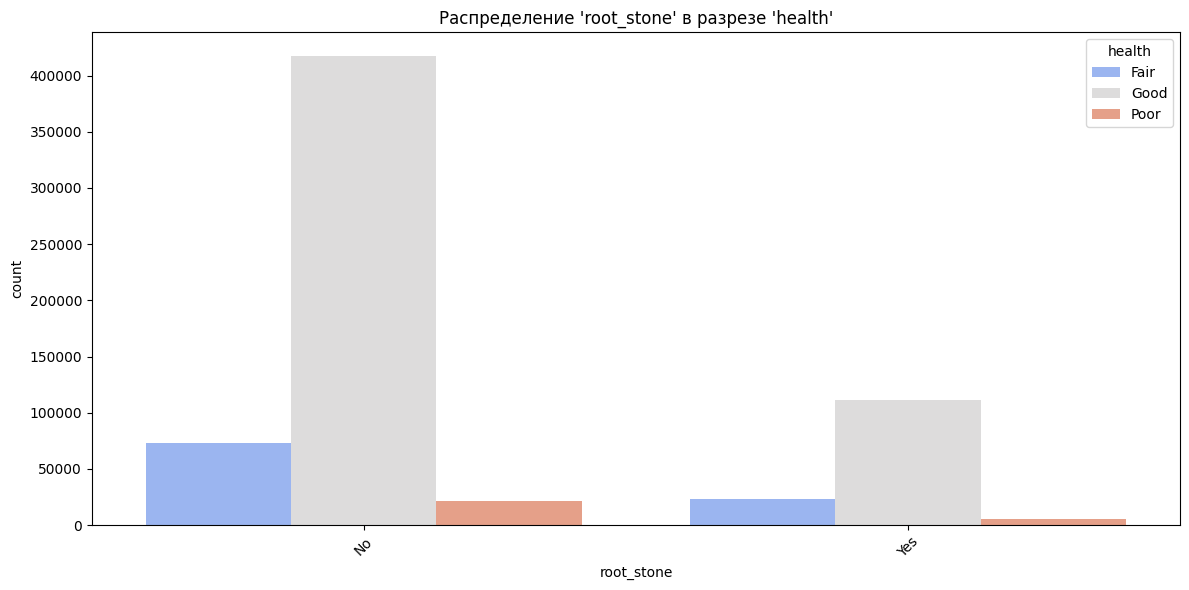

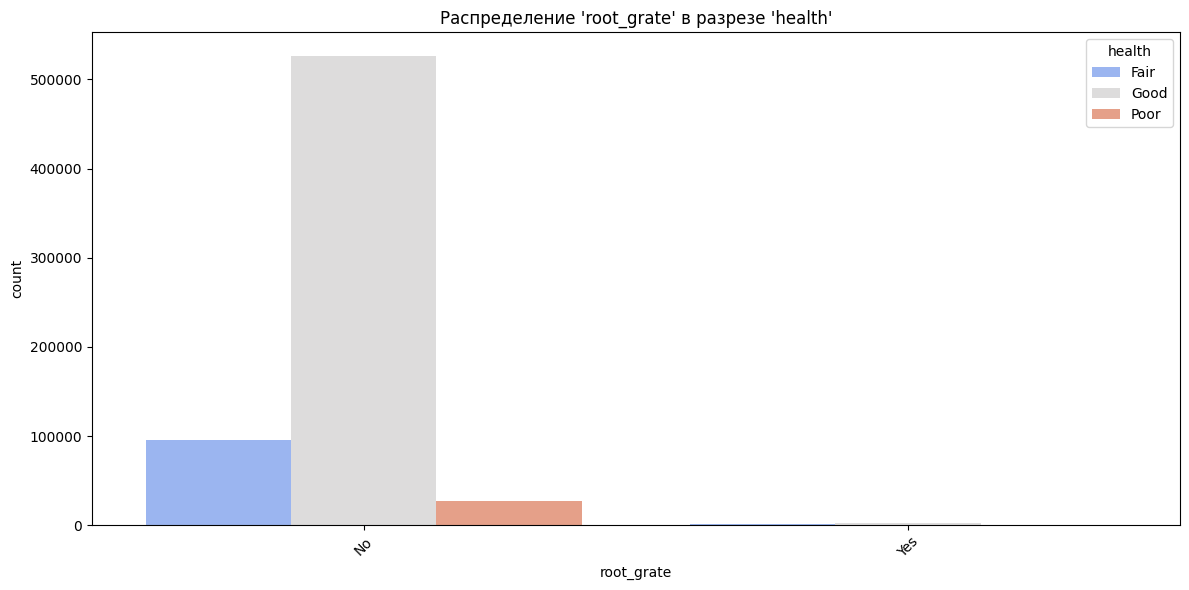

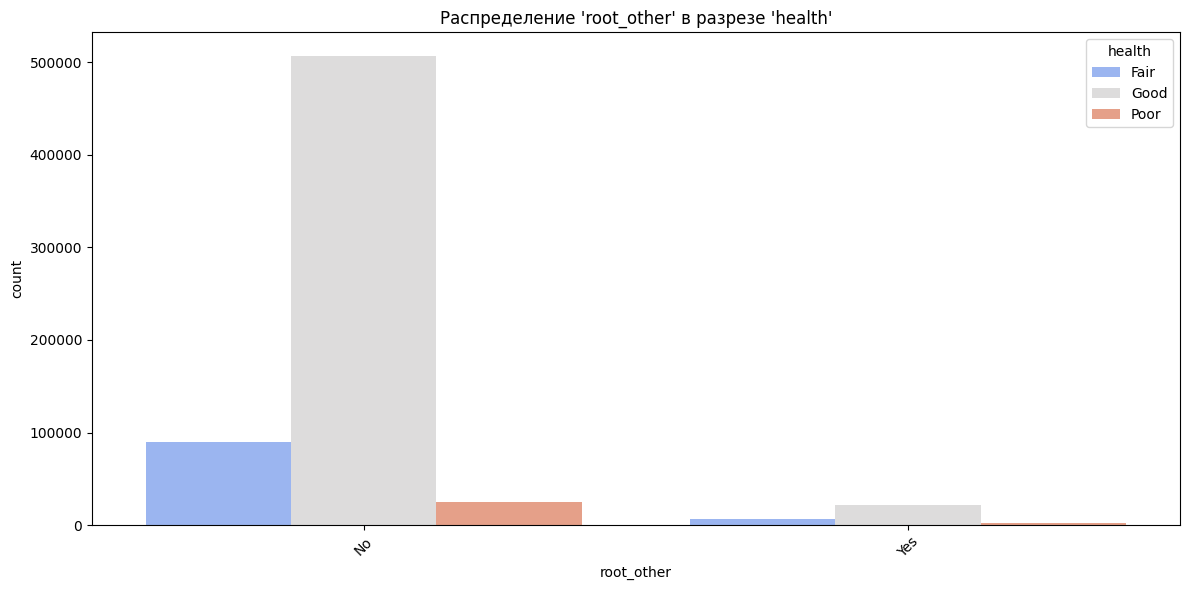

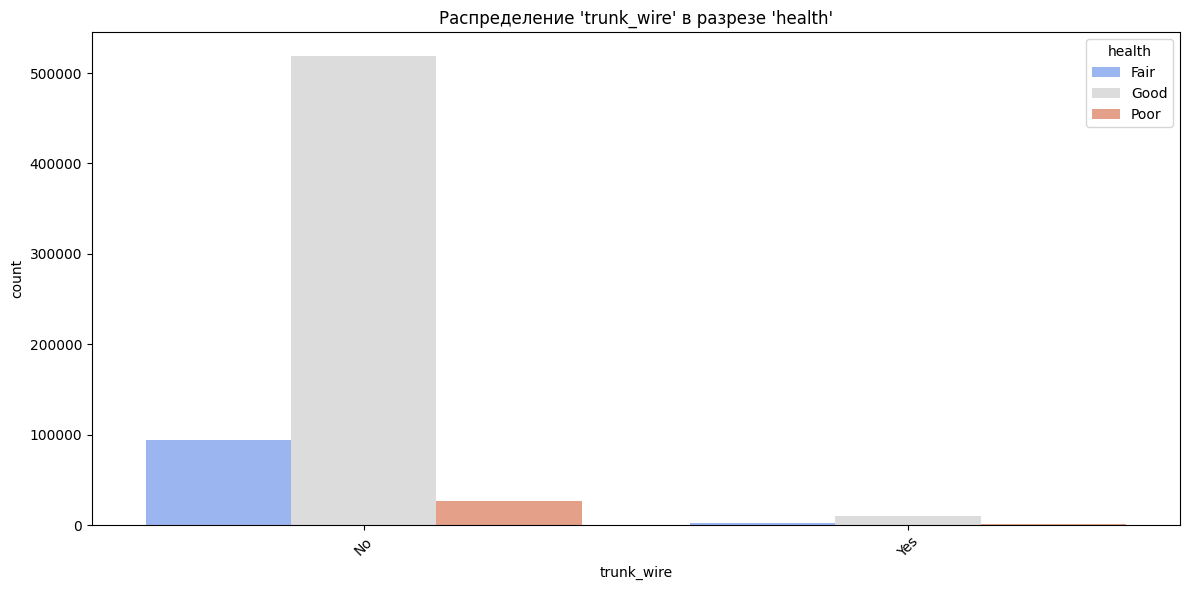

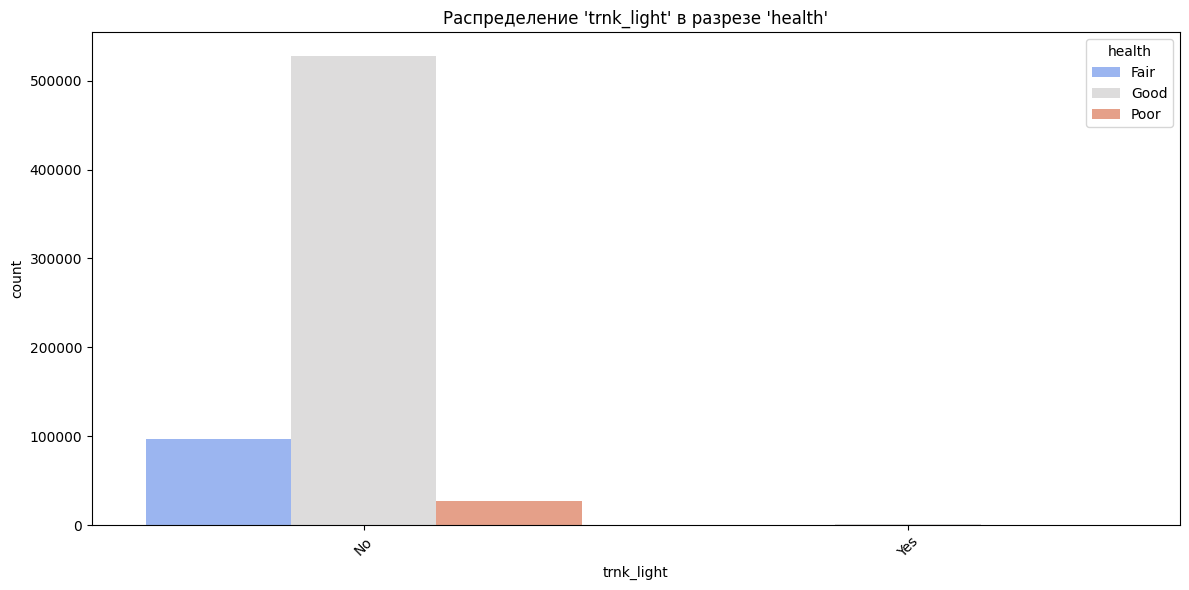

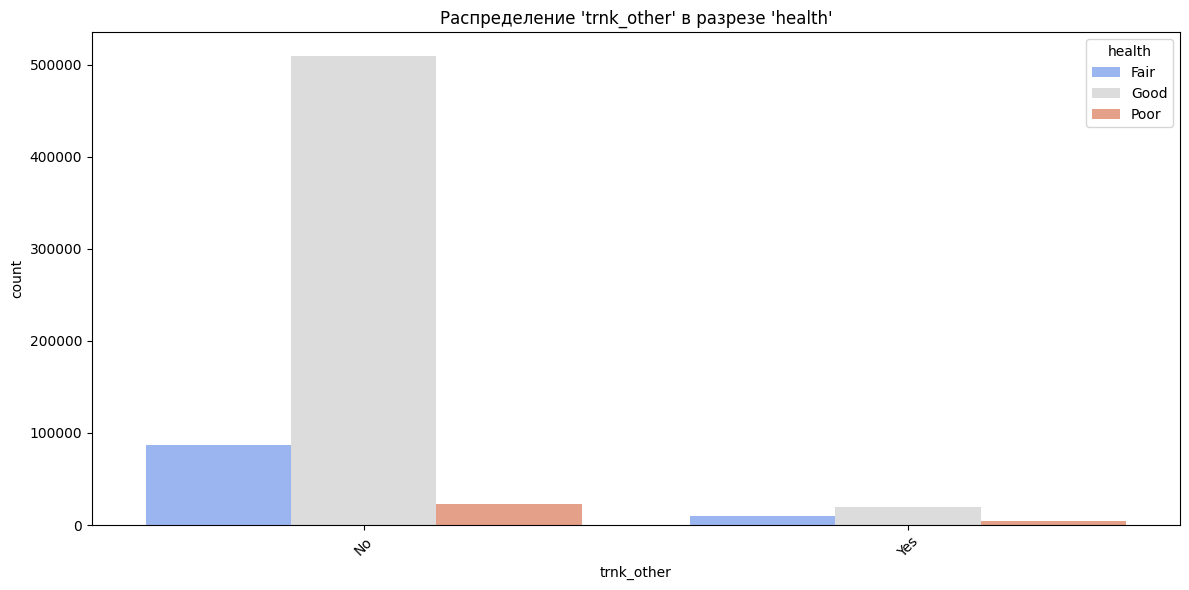

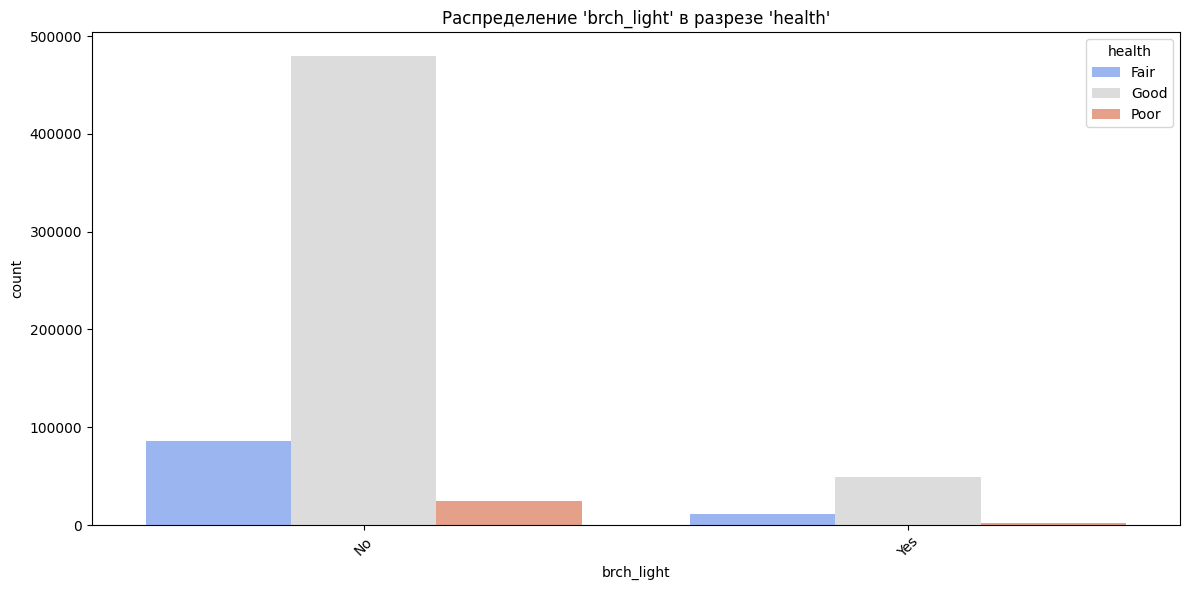

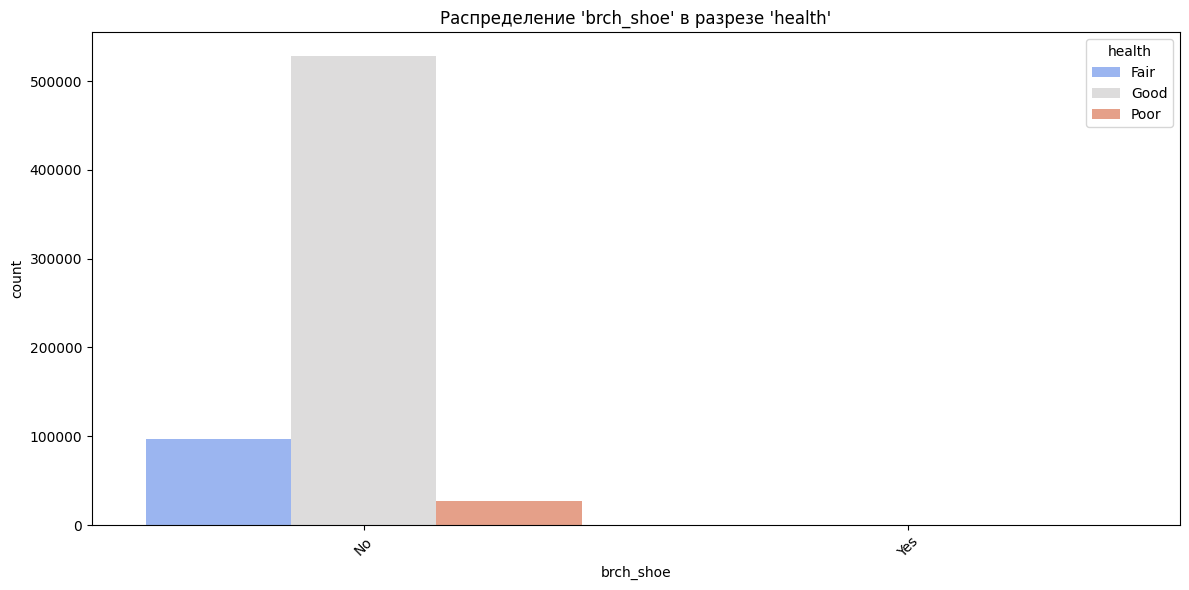

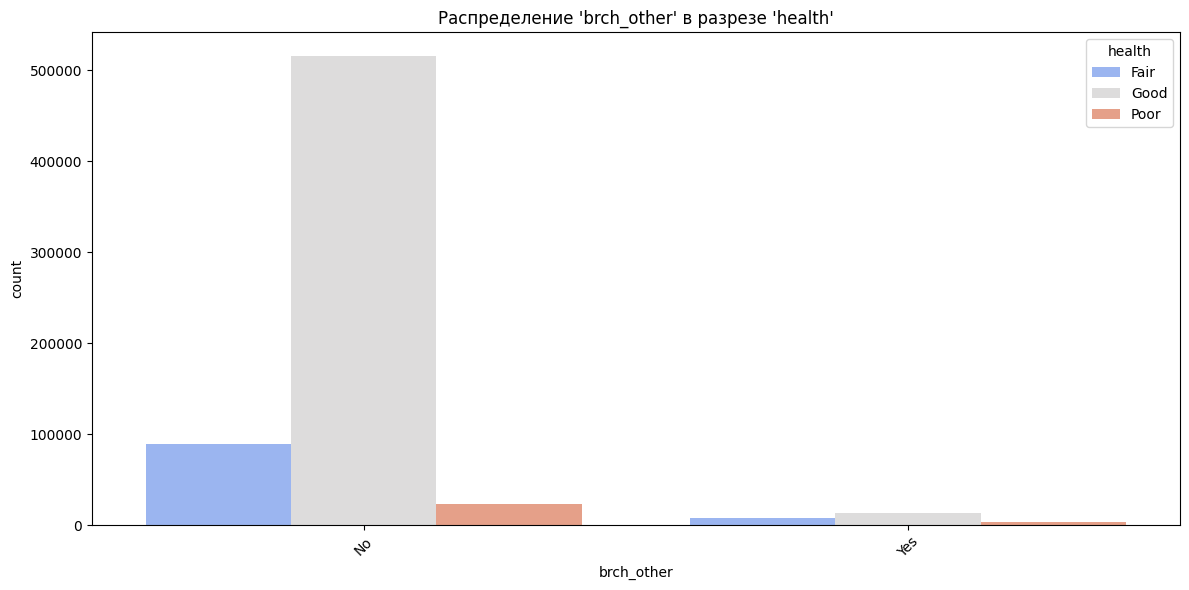

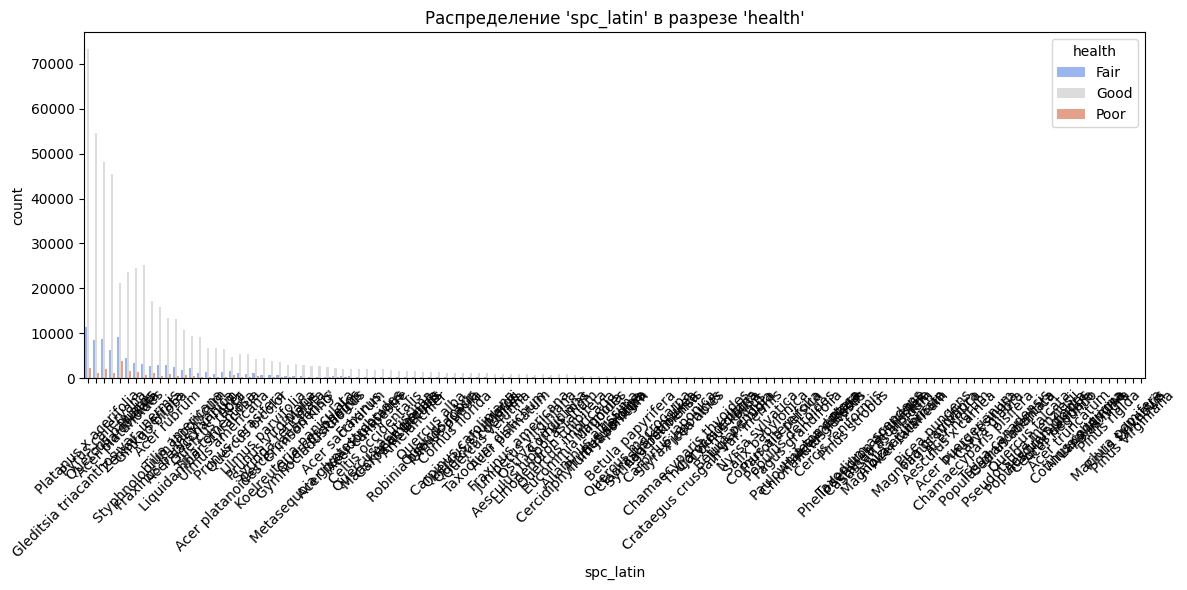

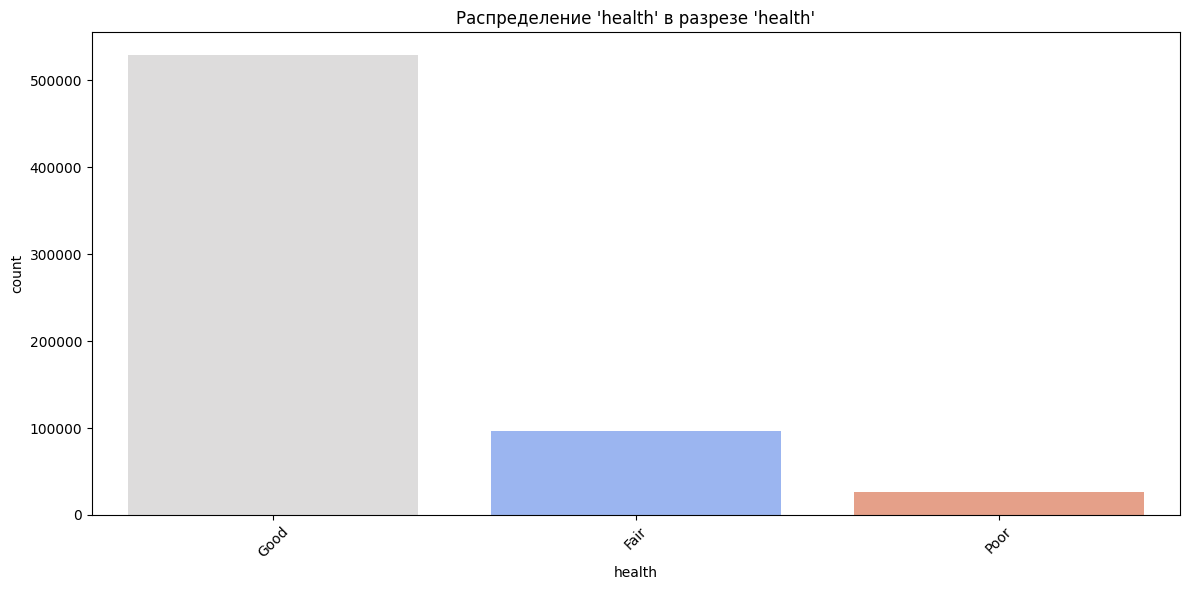

/tmp/ipykernel_230677/2544594321.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="health", y=feature, palette="coolwarm")


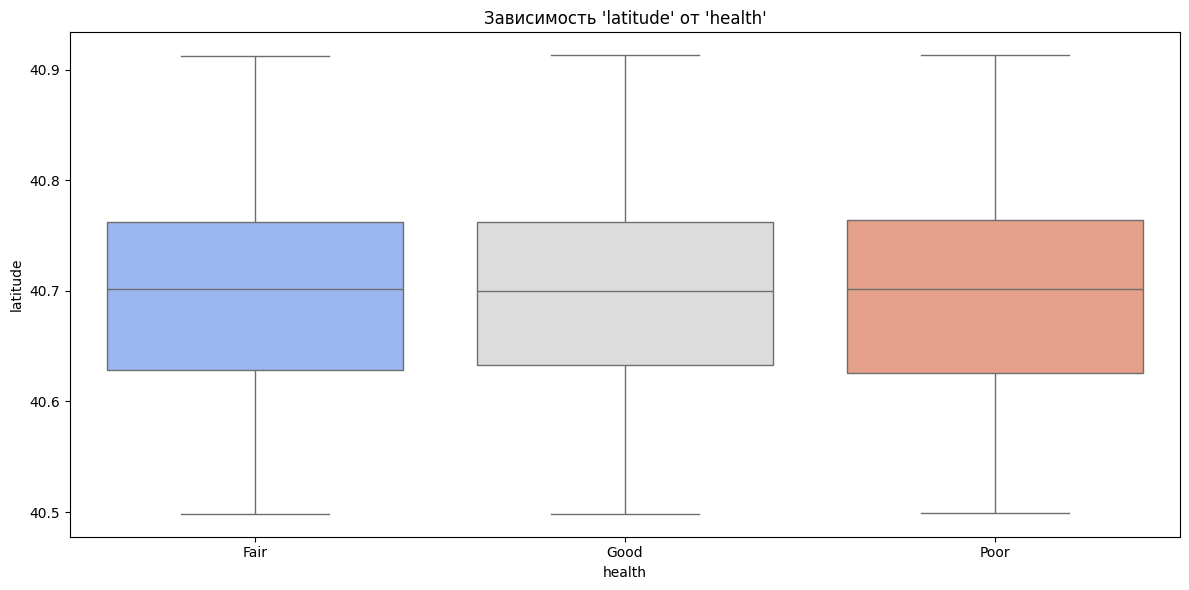

/tmp/ipykernel_230677/2544594321.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="health", y=feature, palette="coolwarm")


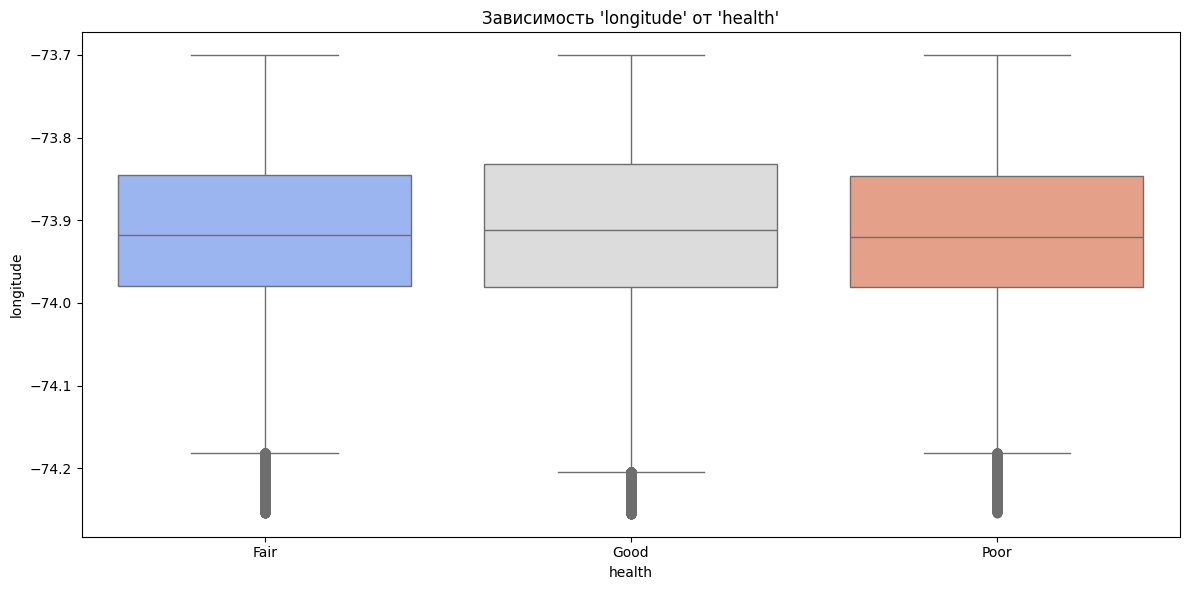

/tmp/ipykernel_230677/2544594321.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="health", y=feature, palette="coolwarm")


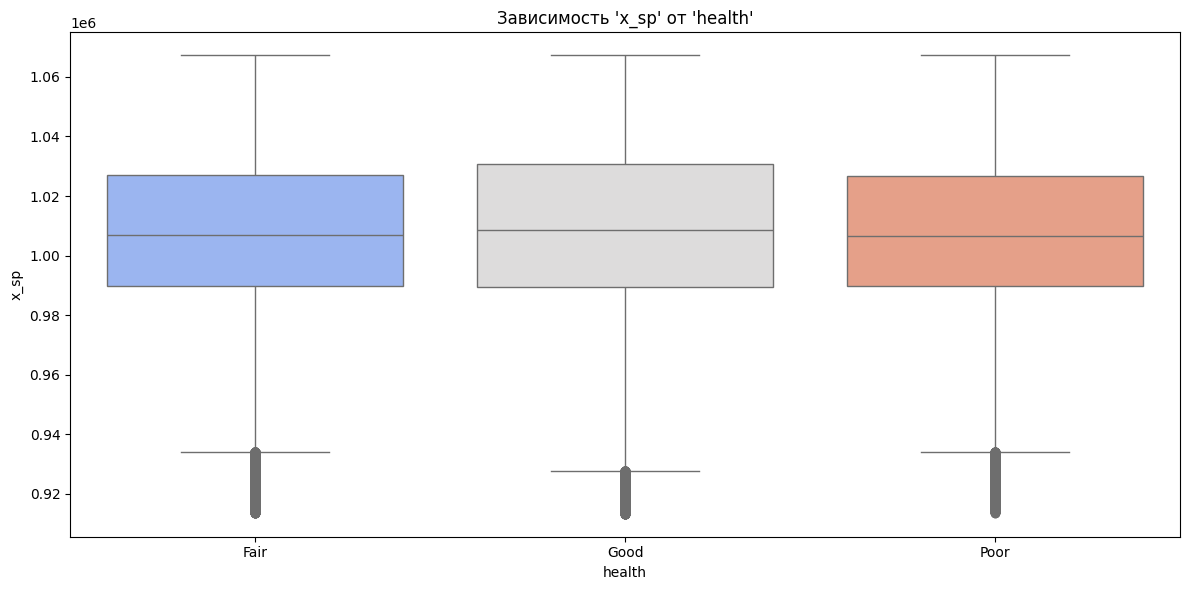

/tmp/ipykernel_230677/2544594321.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="health", y=feature, palette="coolwarm")


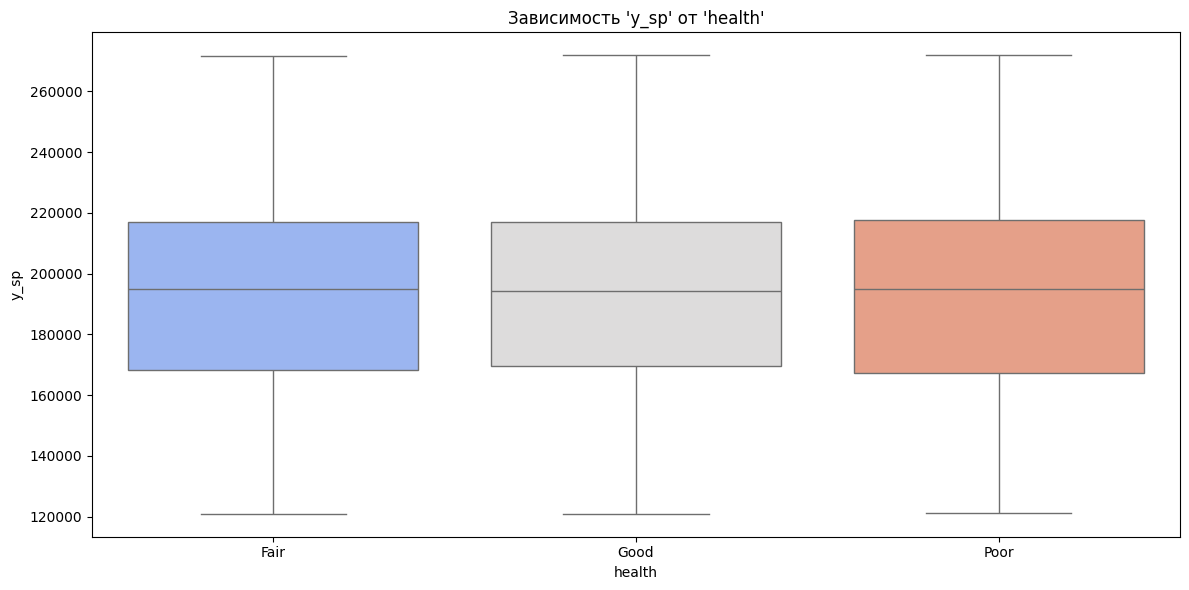

/tmp/ipykernel_230677/2544594321.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="health", y=feature, palette="coolwarm")


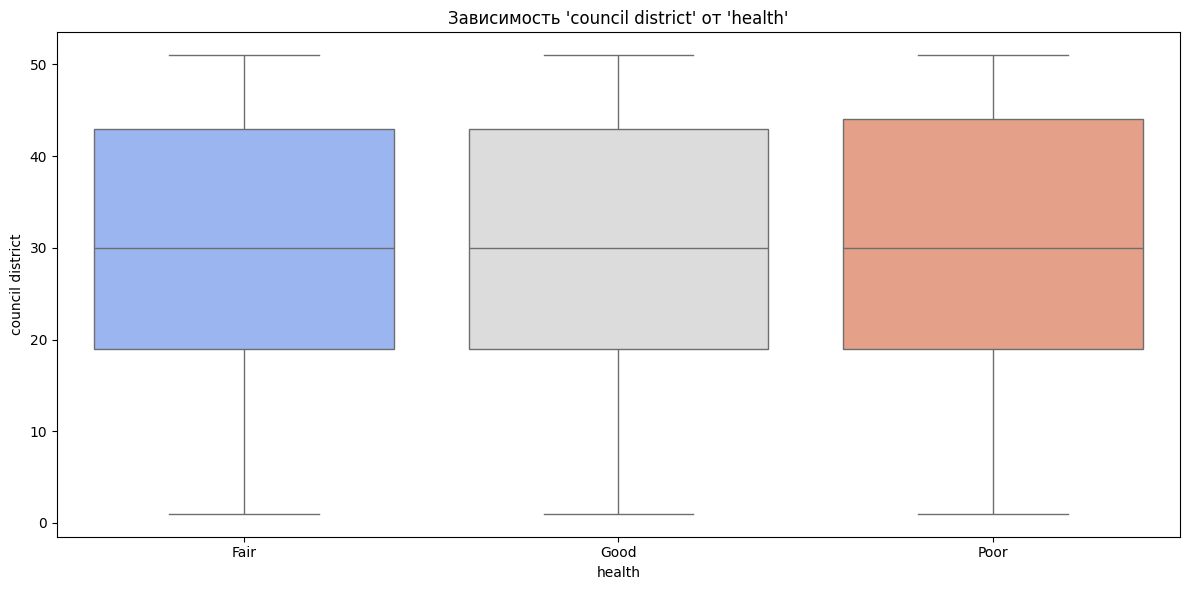

/tmp/ipykernel_230677/2544594321.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="health", y=feature, palette="coolwarm")


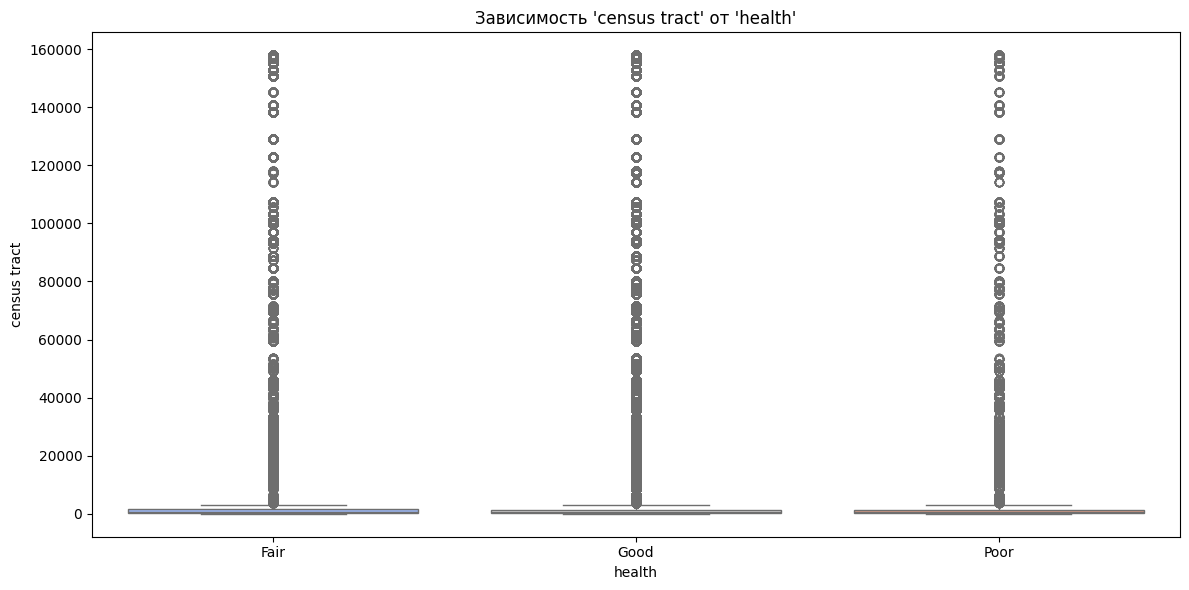

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных
df = pd.read_csv("../data/2015-street-tree-census-tree-data.csv")

# Выбор значимых признаков
selected_features = [
    "tree_dbh", "curb_loc", "steward", "guards", "sidewalk",
    "root_stone", "root_grate", "root_other",
    "trunk_wire", "trnk_light", "trnk_other",
    "brch_light", "brch_shoe", "brch_other",
    "spc_latin", "health", "latitude", "longitude",
    "x_sp", "y_sp", "council district", "census tract",
]

df = df[selected_features]

# 1. Проверка данных
print("Общая информация о выбранных данных:")
df.info()
print("\nКоличество пропущенных значений:")
print(df.isnull().sum())

# 2. Удаление строк с пропусками в целевой переменной
df = df.dropna(subset=["health"])
print("\nРазмер данных после удаления строк с пропусками в 'health':", df.shape)

# 3. Предобработка данных
# Заполнение пропусков в категориальных данных (если есть)
categorical_columns = [
    "curb_loc", "steward", "guards", "sidewalk",
    "root_stone", "root_grate", "root_other",
    "trunk_wire", "trnk_light", "trnk_other",
    "brch_light", "brch_shoe", "brch_other",
    "spc_latin"
]

for col in categorical_columns:
    df[col] = df[col].fillna("Unknown")

# Кодирование целевой переменной
df['health_encoded'] = df['health'].map({"Good": 2, "Fair": 1, "Poor": 0})

# Кодирование категориальных признаков с помощью one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# 4. Анализ числовых признаков
print("\nСтатистики числового признака 'tree_dbh':")
print(df["tree_dbh"].describe())

sns.histplot(df["tree_dbh"], bins=30, kde=True)
plt.title("Распределение 'tree_dbh'")
plt.show()

# 5. Распределение целевой переменной
print("\nРаспределение целевой переменной 'health':")
print(df["health"].value_counts())

sns.countplot(data=df, x="health", order=df["health"].value_counts().index)
plt.title("Распределение 'health'")
plt.show()

# 6. Корреляция между числовыми признаками
numeric_columns = df_encoded.select_dtypes(include=[np.number]).columns
correlation_matrix = df_encoded[numeric_columns].corr()

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Корреляционная матрица числовых признаков")
plt.show()

# 7. Сохранение очищенного датасета
df_encoded.to_csv("../data/cleaned_dataset.csv", index=False)
print("Очищенные данные сохранены в 'cleaned_dataset.csv'")

# Визуализация зависимости целевой переменной от каждого признака
for feature in selected_features:
    plt.figure(figsize=(12, 6))
    
    # Числовые признаки — boxplot
    if df[feature].dtype in ["int64", "float64"]:
        sns.boxplot(data=df, x="health", y=feature, palette="coolwarm")
        plt.title(f"Зависимость '{feature}' от 'health'")
    
    # Категориальные признаки — countplot с hue
    else:
        sns.countplot(data=df, x=feature, hue="health", order=df[feature].value_counts().index, palette="coolwarm")
        plt.title(f"Распределение '{feature}' в разрезе 'health'")
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

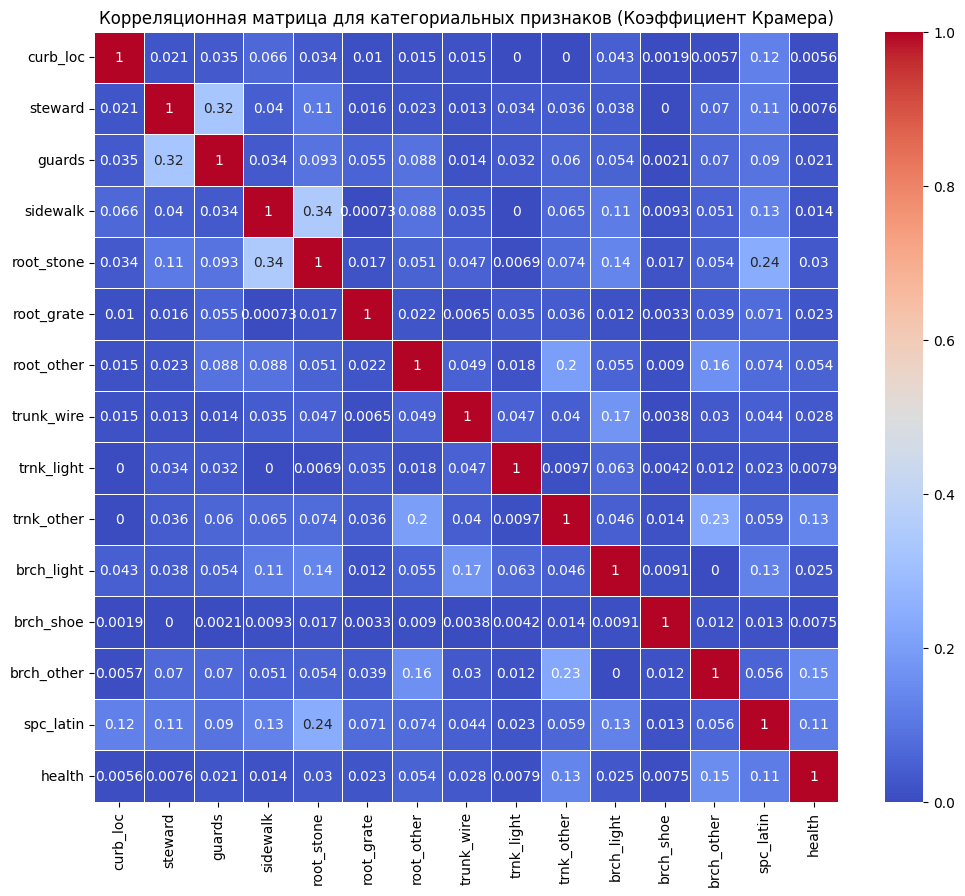

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency  # Импортируем chi2_contingency

def cramers_v(x, y):
    confusion = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion)[0]
    n = confusion.sum().sum()
    phi2 = chi2 / n
    r, k = confusion.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ( (r-1)**2 / (n-1) )
    kcorr = k - ( (k-1)**2 / (n-1) )
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Список категориальных признаков
categorical_columns = [
    "curb_loc", "steward", "guards", "sidewalk",
    "root_stone", "root_grate", "root_other",
    "trunk_wire", "trnk_light", "trnk_other",
    "brch_light", "brch_shoe", "brch_other",
    "spc_latin", "health"
]

# Создание матрицы для коэффициента Крамера
cramers_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Преобразование типов данных
cramers_matrix = cramers_matrix.astype(float)

# Построение тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Корреляционная матрица для категориальных признаков (Коэффициент Крамера)")
plt.show()

In [10]:
# Кодируем целевую переменную
df['health_encoded'] = df['health'].map({"Good": 2, "Fair": 1, "Poor": 0})

In [11]:
# Выбор только числовых признаков
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Вычисление корреляции с закодированной переменной health
correlation_with_health = df[numeric_columns].corr()['health_encoded']

# Вывод результатов
print("Корреляция числовых признаков с 'health':")
print(correlation_with_health)

Корреляция числовых признаков с 'health':
tree_dbh            0.074238
latitude            0.008135
longitude           0.015133
x_sp                0.015092
y_sp                0.008158
council district    0.013407
census tract        0.002108
health_encoded      1.000000
Name: health_encoded, dtype: float64


/tmp/ipykernel_230677/4146286244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_health.index, y=correlation_with_health.values, palette='coolwarm')


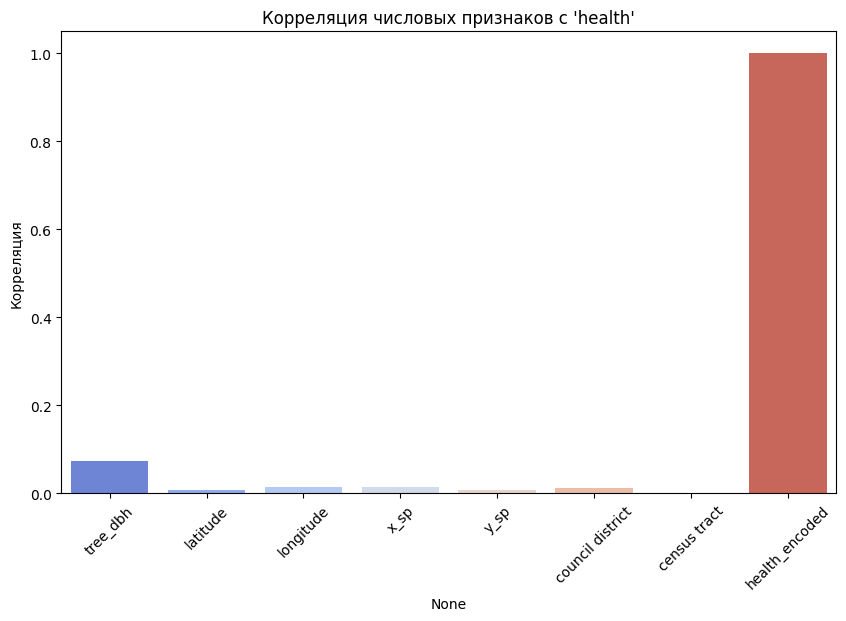

In [12]:
# Визуализация корреляции
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_health.index, y=correlation_with_health.values, palette='coolwarm')
plt.title("Корреляция числовых признаков с 'health'")
plt.xticks(rotation=45)
plt.ylabel("Корреляция")
plt.show()

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns



In [16]:
print("заполняем пропуски")

# Заполнение пропусков для числовых признаков
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols].fillna(df[numeric_cols].mean(), inplace=True)

# Заполнение пропусков для категориальных признаков
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("кодируем целевую переменную")
# Кодируем целевую переменную
df['health_encoded'] = df['health'].map({"Good": 2, "Fair": 1, "Poor": 0})

print("выбор признаков")
# Выбор признаков и целевой переменной
X = df.drop(columns=['health', 'health_encoded']) 
y = df['health_encoded']

# Определение категориальных признаков
categorical_columns = X.select_dtypes(include=['object']).columns

заполняем пропуски


/tmp/ipykernel_230677/554092939.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols].fillna(df[numeric_cols].mean(), inplace=True)


/tmp/ipykernel_230677/554092939.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


кодируем целевую переменную
выбор признаков


In [17]:
# Создание трансформера
print("Создание трансформера для кодирования признаков...")
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Применение трансформации
print("Применение трансформации...")
X_encoded = column_transformer.fit_transform(X)

Создание трансформера для кодирования признаков...
Применение трансформации...


In [18]:
# Разделение данных на обучающую и тестовую выборки
print("Разделение данных на обучающую и тестовую выборки...")
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

Разделение данных на обучающую и тестовую выборки...


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time

# Заполнение пропусков
print("Заполнение пропусков...")
df.fillna(df.mean(), inplace=True)  # Заполнение числовых признаков
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Заполнение категориальных признаков

# Кодируем целевую переменную
print("Кодирование целевой переменной...")
df['health_encoded'] = df['health'].map({"Good": 2, "Fair": 1, "Poor": 0})

# Выбор признаков и целевой переменной
X = df.drop(columns=['health', 'health_encoded']) 
y = df['health_encoded']

# Определение категориальных признаков
categorical_columns = X.select_dtypes(include=['object']).columns

# Создание трансформера
print("Создание трансформера для кодирования признаков...")
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Применение трансформации
print("Применение трансформации...")
X_encoded = column_transformer.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
print("Разделение данных на обучающую и тестовую выборки...")
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Обучение модели
print("Обучение модели...")
start_time = time.time()
model = RandomForestClassifier(random_state=42,n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()
print(f"Модель обучена за {end_time - start_time:.2f} секунд.")

# Получение важности признаков
print("Получение важности признаков...")
importances = model.feature_importances_
feature_names = column_transformer.transformers_[0][1].get_feature_names_out(categorical_columns)
all_feature_names = np.concatenate([feature_names, X.columns[~X.columns.isin(categorical_columns)]])
feature_importances = pd.DataFrame(importances, index=all_feature_names, columns=['importance']).sort_values('importance', ascending=False)

# Визуализация важности признаков
print("Визуализация важности признаков...")
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index, palette='coolwarm')
plt.title('Важность Признаков для Модели Случайного Леса')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.show()

у меня удалился весь eda, поэтому я восстанавливал его с нуля, фото с данными о важностис помощью RF и PCA будет лежать в data/

